In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## 4. End of Distribution imputation

### It works well if the data are not missing at random (MNAR)

<AxesSubplot:>

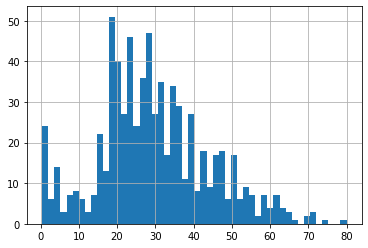

In [4]:
df.Age.hist(bins=50)

<AxesSubplot:xlabel='Age'>

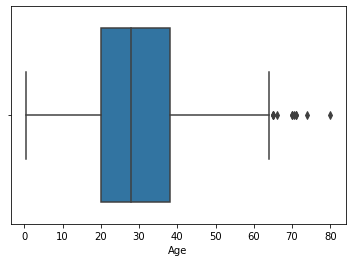

In [5]:
sns.boxplot(df.Age)

#### Outliers are found in right side. So we are replacing the nan values with end value(based on standard normal distribution 3rd SD value of right side). By doing this outliers are controlled.

In [7]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [15]:
def impute_nan(df,variable,extreme):
    df[variable+'_end_of_dist']=df[variable].fillna(extreme)
    df[variable+'_median']=df[variable].fillna(df[variable].median())

In [16]:
impute_nan(df,'Age',extreme)

In [17]:
df.iloc[31:38]

,Survived,Age,Fare,Age_end_of_dist,Age_median
31,1,NaN,146.5208,73.27861,28.0
32,1,NaN,7.7500,73.27861,28.0
33,0,66.0,10.5000,66.00000,66.0
34,0,28.0,82.1708,28.00000,28.0
35,0,42.0,52.0000,42.00000,42.0
36,1,NaN,7.2292,73.27861,28.0
37,0,21.0,8.0500,21.00000,21.0


<AxesSubplot:>

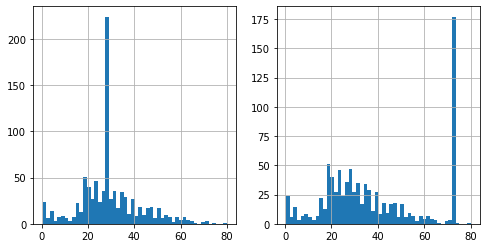

In [29]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
df.Age_median.hist(bins=50)
plt.subplot(1,2,2)
df.Age_end_of_dist.hist(bins=50)

<AxesSubplot:xlabel='Age_end_of_dist'>

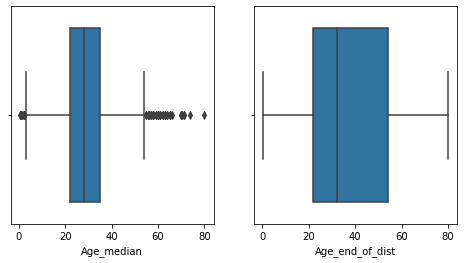

In [31]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(df.Age_median)
plt.subplot(1,2,2)
sns.boxplot(df.Age_end_of_dist)

## Advantages

1. Easy to implement
2. Captures the importance of missingness if there is one

## Disadvantages

1. Distorts the original distribution of the variable
2. If the missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of nan is big, It will mask true outliers in the distribution
4. If the number of nan is small, the replaced nan may be considered as outliers and pre-processed in a subsequent step of feature engineering

## 5. Arbitrary imputation

#### Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable with an arbitrary value. The arbitrary value should be different from the mean or median and not within the normal values of the variable. 

This technique was used in kaggle competition. It consists of replacing nan by arbitrary values (mostly not used). This method for finding the importance of nan

In [3]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

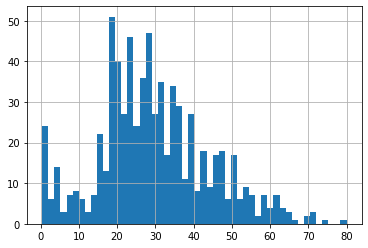

In [5]:
df.Age.hist(bins=50)

In [6]:
# Take outside value from this range (0-80)

In [7]:
def impute_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)

In [8]:
impute_nan(df,'Age')

In [9]:
df.head(3)

,Survived,Age,Fare,Age_hundred
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0


## Advantages
1. Easy to implement
2. Captures the importance of missingess if there is one

## Disadvantages
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use

## 6. Frequent categories imputation

#### This imputation is mostly used when the categorical nan value mean<40%. Replacing the nan with most frequent value in features

In [30]:
df=pd.read_csv('adv_house_pred.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [31]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [32]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [33]:
# finding the most repeated value in features and filling nan with it

In [34]:
def inpute_nan(df,variable):
    df[variable+'_freq']=df[variable].fillna(df[variable].value_counts().index[0])

In [35]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
    inpute_nan(df,i)

In [36]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_freq,FireplaceQu_freq,GarageType_freq
0,Gd,NaN,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [44]:
# for comparision purpose

In [43]:
df['BsmtQual'].value_counts(), df['BsmtQual_freq'].value_counts()

(TA    649
 Gd    618
 Ex    121
 Fa     35
 Name: BsmtQual, dtype: int64,
 TA    686
 Gd    618
 Ex    121
 Fa     35
 Name: BsmtQual_freq, dtype: int64)

In [45]:
df['FireplaceQu'].value_counts(), df['FireplaceQu_freq'].value_counts()

(Gd    380
 TA    313
 Fa     33
 Ex     24
 Po     20
 Name: FireplaceQu, dtype: int64,
 Gd    1070
 TA     313
 Fa      33
 Ex      24
 Po      20
 Name: FireplaceQu_freq, dtype: int64)

In [46]:
df['GarageType'].value_counts(), df['GarageType_freq'].value_counts()

(Attchd     870
 Detchd     387
 BuiltIn     88
 Basment     19
 CarPort      9
 2Types       6
 Name: GarageType, dtype: int64,
 Attchd     951
 Detchd     387
 BuiltIn     88
 Basment     19
 CarPort      9
 2Types       6
 Name: GarageType_freq, dtype: int64)

In [25]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1,inplace=True)

In [26]:
df.head()

,SalePrice,BsmtQual_freq,FireplaceQu_freq,GarageType_freq
0,208500,Gd,Gd,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### Advantages
1. Easy To implement
2. Fater way to implement

### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label